In [108]:
import pandas as pd
from datetime import datetime
from datetime import date
import numpy as np

In [163]:
# Bring in salary df's, seems to also have majority of box score info
all_sals = pd.DataFrame()
for i in range(2017,2022):
    temp = pd.read_csv(f'{i}_salaries.csv',parse_dates=['date'])
    all_sals = all_sals.append(temp)

# Box score transformations
1. Bring in box scores

2. Clean up box scores for analysis

In [164]:
stats_2020 = pd.read_csv('boxscores_2021.csv')

FileNotFoundError: [Errno 2] File b'boxscores_2021.csv' does not exist: b'boxscores_2021.csv'

In [111]:
df.head()

,name,position,salary,team,points,rebounds,assists,steals,blocks,tos,threes,fg,ft,minutes,date,opponent,home_away
0,"Lillard, Damian",PG,"$8,900",por,39.0,9.0,6.0,NaN,NaN,4.0,4.0,13-20,9-9,35:25,2016-10-25,uta,home
1,"Irving, Kyrie",PG,"$7,100",cle,29.0,2.0,4.0,2.0,NaN,NaN,4.0,12-22,1-1,29:48,2016-10-25,nyk,home
2,"Hood, Rodney",SG,"$5,400",uta,26.0,2.0,1.0,2.0,1.0,NaN,3.0,9-17,5-5,37:39,2016-10-25,por,away
3,"Hill, George",PG,"$5,600",uta,19.0,2.0,6.0,2.0,1.0,1.0,1.0,7-18,4-4,38:45,2016-10-25,por,away
4,"Curry, Stephen",PG,"$9,300",gsw,26.0,3.0,NaN,NaN,NaN,4.0,3.0,9-18,5-6,34:06,2016-10-25,sas,home


In [112]:
def split_dash_1(x):
    try:
        return float(x.split("-")[0])
    except:
        return np.nan

def split_dash_2(x):
    try:
        return float(x.split("-")[1])
    except:
        return np.nan

In [113]:
for i in ['FG','3PT','FT']:
    stats_2020[f'{i}_made'] = stats_2020[i].apply(split_dash_1)
    stats_2020[f'{i}_attempted'] = stats_2020[i].apply(split_dash_2)

In [114]:
def total_points(row):
    try:
        return row['3PT_made'] + row['AST']*1.5 + row['BLK']*3 +\
               row['FG_made']*2 + row['FT_made'] + row['REB']*1.2 +\
               row['STL']*3 - row['TO']
    except Exception as e:
        return e

In [115]:
stats_2020.replace('--',0,inplace=True)

In [116]:
for i in stats_2020.columns:
    try:
        stats_2020[i] = stats_2020[i].astype(float)
    except Exception as e:
        print("\n",i,e)

stats_2020.dtypes


 team could not convert string to float: 'bos'

 player could not convert string to float: 'jayson-tatum'

 pos could not convert string to float: 'PF'

 FG could not convert string to float: '8-22'

 3PT could not convert string to float: '4-8'

 FT could not convert string to float: '1-3'


id               float64
team              object
player            object
pos               object
MIN              float64
FG                object
3PT               object
FT                object
OREB             float64
DREB             float64
REB              float64
AST              float64
STL              float64
BLK              float64
TO               float64
PF               float64
+/-              float64
PTS              float64
FG_made          float64
FG_attempted     float64
3PT_made         float64
3PT_attempted    float64
FT_made          float64
FT_attempted     float64
dtype: object

In [117]:
stats_2020['fd_points'] = stats_2020.apply(total_points,axis=1)

In [118]:
'$8,900'[1:2]+'$8,900'[3:]

'8900'

In [119]:
stats_2020.columns

Index(['id', 'team', 'player', 'pos', 'MIN', 'FG', '3PT', 'FT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', '+/-', 'PTS', 'FG_made',
       'FG_attempted', '3PT_made', '3PT_attempted', 'FT_made', 'FT_attempted',
       'fd_points'],
      dtype='object')

In [120]:
def replace_dollars(x):
    if pd.isnull(x)==False:
        return int(x.replace(',','')[1:])
    else:
        return np.nan

In [121]:
df['salary'] = df.salary.apply(replace_dollars)

In [122]:
df.head()

,name,position,salary,team,points,rebounds,assists,steals,blocks,tos,threes,fg,ft,minutes,date,opponent,home_away
0,"Lillard, Damian",PG,8900.0,por,39.0,9.0,6.0,NaN,NaN,4.0,4.0,13-20,9-9,35:25,2016-10-25,uta,home
1,"Irving, Kyrie",PG,7100.0,cle,29.0,2.0,4.0,2.0,NaN,NaN,4.0,12-22,1-1,29:48,2016-10-25,nyk,home
2,"Hood, Rodney",SG,5400.0,uta,26.0,2.0,1.0,2.0,1.0,NaN,3.0,9-17,5-5,37:39,2016-10-25,por,away
3,"Hill, George",PG,5600.0,uta,19.0,2.0,6.0,2.0,1.0,1.0,1.0,7-18,4-4,38:45,2016-10-25,por,away
4,"Curry, Stephen",PG,9300.0,gsw,26.0,3.0,NaN,NaN,NaN,4.0,3.0,9-18,5-6,34:06,2016-10-25,sas,home


In [123]:
import pickle
games1 = pickle.load(open(f'full_df_2020.p','rb'))
dups = games1[games1.game_ids.duplicated(keep='first')].sort_values(by='game_ids')
dups['note'] = 'mexico_city_game'
games1 = games1[~games1.game_ids.duplicated(keep=False)]
games1 = games1.append(dups)
games1.rename(columns = {'game_ids':'id'},inplace=True)

/Users/Kevin/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [157]:
games1.date.max()

Timestamp('2021-08-14 00:00:00')

In [124]:
games1['id'] = games1.id.astype(float)

In [125]:
stats_2020_w_games = stats_2020.merge(games1,how='left',on='id')

In [126]:
salaries = df[['name','date','salary','home_away']]
salaries.rename(columns = {'name':'player'},inplace=True)

/Users/Kevin/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [127]:
salaries.head()

,player,date,salary,home_away
0,"Lillard, Damian",2016-10-25,8900.0,home
1,"Irving, Kyrie",2016-10-25,7100.0,home
2,"Hood, Rodney",2016-10-25,5400.0,away
3,"Hill, George",2016-10-25,5600.0,away
4,"Curry, Stephen",2016-10-25,9300.0,home


In [128]:
a = 'Lillard, Damian'.lower()
a[:a.index(',')]
a[a.index(',')+2:]

'damian'

In [129]:
def rearrange_name(x):
    return (x[x.index(',')+2:]+"-"+x[:x.index(',')]).lower()

In [130]:
salaries['player'] = salaries.player.apply(rearrange_name)

/Users/Kevin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [133]:
stats_2020_w_games.date.min()

Timestamp('2020-10-22 00:00:00')

In [135]:
salaries[salaries.date>stats_2020_w_games.date.min()]

,player,date,salary,home_away
0,deandre-ayton,2020-12-16,NaN,home
1,andre-drummond,2020-12-16,NaN,away
2,zach-lavine,2020-12-16,NaN,away
3,mitchell-robinson,2020-12-16,NaN,home
4,nikola-jokic,2020-12-16,NaN,home
...,...,...,...,...
4164,chimezie-metu,2021-01-06,3500.0,home
4165,onyeka-okongwu,2021-01-06,3500.0,home
4166,anzejs-pasecniks,2021-01-06,3500.0,away
4167,nick-richards,2021-01-06,3500.0,away


In [140]:
salaries.date.max()

Timestamp('2021-01-06 00:00:00')

In [141]:
all_vals = salaries[salaries.salary.isnull()==False].merge(stats_2020_w_games,on=['player','date'],how='right')

In [151]:
stats_2020_w_games[(stats_2020_w_games.player == 'paul-george') & (stats_2020_w_games.date>date.today())]

/Users/Kevin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


,id,team,player,pos,MIN,FG,3PT,FT,OREB,DREB,...,3PT_attempted,FT_made,FT_attempted,fd_points,date,home_team,home_team_score,note,visit_team,visit_team_score
1168,401161460.0,lac,paul-george,SG,15.0,2-7,0-2,0-0,0.0,1.0,...,2.0,0.0,0.0,8.7,2021-02-13,bos,141,NaN,lac,133
5140,401161444.0,lac,paul-george,SG,35.0,3-15,1-4,4-6,0.0,12.0,...,4.0,4.0,6.0,33.9,2021-02-11,phi,110,NaN,lac,103
5239,401161539.0,lac,paul-george,SG,30.0,8-13,4-8,4-5,1.0,3.0,...,8.0,4.0,5.0,35.3,2021-03-01,lac,136,NaN,phi,130
8545,401161433.0,lac,paul-george,SG,24.0,8-12,5-8,1-1,0.0,6.0,...,8.0,1.0,1.0,38.2,2021-02-09,cle,92,NaN,lac,133
12503,401161528.0,lac,paul-george,SG,25.0,9-15,6-8,0-0,0.0,4.0,...,8.0,0.0,0.0,30.8,2021-02-28,lac,132,NaN,den,103
12695,401224782.0,lac,paul-george,SG,36.0,9-20,4-9,5-7,1.0,3.0,...,9.0,5.0,7.0,44.8,2021-08-12,den,111,NaN,lac,124
13419,401161369.0,lac,paul-george,SG,25.0,9-18,3-6,0-0,1.0,6.0,...,6.0,0.0,0.0,40.4,2021-02-01,lac,118,NaN,min,106
13472,401161424.0,lac,paul-george,SG,26.0,8-20,1-8,4-4,1.0,4.0,...,8.0,4.0,4.0,41.0,2021-02-08,min,142,NaN,lac,115
14515,401161554.0,lac,paul-george,SG,27.0,5-10,3-5,3-4,1.0,4.0,...,5.0,3.0,4.0,31.5,2021-03-03,okc,94,NaN,lac,109
15572,401224755.0,lac,paul-george,SG,28.0,8-16,3-6,2-2,0.0,6.0,...,6.0,2.0,2.0,36.2,2021-08-08,por,117,NaN,lac,122


In [155]:
stats_2020_w_games['date'].max()

Timestamp('2021-08-14 00:00:00')

In [144]:
salaries[salaries.player=='paul-george']

,player,date,salary,home_away
204,paul-george,2016-10-26,9500.0,home
590,paul-george,2016-10-28,9200.0,away
855,paul-george,2016-10-29,9200.0,away
1414,paul-george,2016-11-01,9200.0,home
1921,paul-george,2016-11-03,9200.0,away
...,...,...,...,...
2128,paul-george,2020-12-30,7600.0,home
2557,paul-george,2021-01-01,7800.0,away
3090,paul-george,2021-01-03,8000.0,away
3692,paul-george,2021-01-05,8800.0,home


In [143]:
all_vals[all_vals.player == 'paul-george']

,player,date,salary,home_away,id,team,pos,MIN,FG,3PT,...,3PT_made,3PT_attempted,FT_made,FT_attempted,fd_points,home_team,home_team_score,note,visit_team,visit_team_score
0,paul-george,2020-12-22,7600.0,away,401161084.0,lac,SG,34.0,6-17,2-5,...,2.0,5.0,4.0,6.0,25.9,okc,118,NaN,lac,112
170,paul-george,2020-12-25,7600.0,away,401161100.0,lac,SG,37.0,5-18,1-6,...,1.0,6.0,6.0,6.0,34.5,lal,106,NaN,lac,111
815,paul-george,2021-01-05,8800.0,home,401161176.0,lac,SG,26.0,9-14,5-6,...,5.0,6.0,9.0,11.0,40.3,lac,135,NaN,ny,132
1256,paul-george,2020-11-20,NaN,NaN,401160854.0,lac,SG,37.0,8-18,4-11,...,4.0,11.0,5.0,6.0,41.0,lac,107,NaN,bos,104
2060,paul-george,2021-02-13,NaN,NaN,401161460.0,lac,SG,15.0,2-7,0-2,...,0.0,2.0,0.0,0.0,8.7,bos,141,NaN,lac,133
5881,paul-george,2021-02-11,NaN,NaN,401161444.0,lac,SG,35.0,3-15,1-4,...,1.0,4.0,4.0,6.0,33.9,phi,110,NaN,lac,103
5980,paul-george,2021-03-01,NaN,NaN,401161539.0,lac,SG,30.0,8-13,4-8,...,4.0,8.0,4.0,5.0,35.3,lac,136,NaN,phi,130
6641,paul-george,2020-12-11,NaN,NaN,401161001.0,lac,SG,33.0,3-14,2-12,...,2.0,12.0,5.0,5.0,27.5,tor,92,NaN,lac,112
7877,paul-george,2020-12-14,NaN,NaN,401161024.0,lac,SG,31.0,9-20,3-6,...,3.0,6.0,6.0,7.0,40.8,chi,109,NaN,lac,106
9140,paul-george,2021-02-09,NaN,NaN,401161433.0,lac,SG,24.0,8-12,5-8,...,5.0,8.0,1.0,1.0,38.2,cle,92,NaN,lac,133


In [106]:
salaries[salaries.player=='jayson-tatum']

,player,date,salary,home_away
276,jayson-tatum,2017-10-06,NaN,away
550,jayson-tatum,2017-10-09,NaN,home
679,jayson-tatum,2017-10-11,NaN,away
827,jayson-tatum,2017-10-17,3500.0,away
1035,jayson-tatum,2017-10-18,3500.0,home
...,...,...,...,...
36852,jayson-tatum,2020-09-17,NaN,home
36894,jayson-tatum,2020-09-19,NaN,away
36949,jayson-tatum,2020-09-23,NaN,away
36984,jayson-tatum,2020-09-25,NaN,home


In [105]:
stats_2020_w_games.player[0]

'jayson-tatum'

In [107]:
stats_2020_w_games.date.min()

Timestamp('2020-10-22 00:00:00')

In [15]:
lebron = stats_2020[stats_2020.player == 'L. JamesL. James']

In [16]:
ad = stats_2020[stats_2020.player == 'A. DavisA. Davis']

In [17]:
lebron_ad = pd.merge(lebron,ad, on='id',suffixes=['_lebron','_ad'])

In [18]:
len(lebron_ad)

58

In [19]:
lebron_ad[['fd_points_lebron']].corrwith(lebron_ad['fd_points_ad'])

fd_points_lebron   -0.054326
dtype: float64

In [20]:
import matplotlib.pyplot as plt
% matplotlib inline

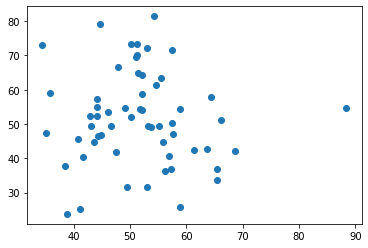

In [21]:
plt.scatter(lebron_ad['fd_points_lebron'],lebron_ad['fd_points_ad'])

In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [ ]:
np.polyfit(lebron_ad.fd_points_ad, lebron_ad, 1)

In [ ]:
#sns.regplot('fd_points_lebron','fd_points_ad',lebron_ad)

In [ ]:
from IPython.display import display

In [ ]:
# Define the model
lm1 = smf.ols('fd_points_lebron ~ fd_points_ad', data=lebron_ad)

# Fit the model
fit1 = lm1.fit()

# Print summary statistics of the model's performance
display(fit1.cov_params())
fit1.conf_int()

In [ ]:
fit1.summary()

In [ ]:
lebron_ad[['fd_points_lebron']].corrwith(lebron_ad['fd_points_ad'])

In [ ]:
df.dtypes

In [ ]:
#Adjust salary to integers
df['salary'] = df.salary.str.replace("$",'').str.replace(',','').astype(float)

In [ ]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day

In [ ]:
#season starts
season_2020_start = datetime(2019,10,22)
season_2020_suspend = datetime(2020,3,11)
season_2020_seeding_start = datetime(2020,7,30)
season_2020_seeding_end = datetime(2020,8,14)
season_2019_start = datetime(2018,10,16)
season_2019_end = datetime(2019,4,10)
season_2018_start = datetime(2017,10,17)
season_2018_end = datetime(2018,4,11)
season_2017_start = datetime(2016,10,25)
season_2017_end = datetime(2017,4,12)


In [ ]:
def seasons(x):
    if x >= season_2017_start and x <= season_2017_end:
        return '2017_season'
    
    if x >= season_2018_start and x <= season_2018_end:
        return '2018_season'
    
    if x >= season_2019_start and x <= season_2019_end:
        return '2019_season'
    
    if x >= season_2020_start and x <= season_2020_seeding_end:
        return '2020_season'

    #if x >= season_2020_seeding_start and x <= season_2020_seeding_end:
        #return '2020_season_seeding'

In [ ]:
df['seasons'] = df['date'].apply(seasons)

In [ ]:
df

In [ ]:
pd.options.display.max_rows = 999

In [ ]:
pd.options.display.max_rows = 75

In [ ]:
df[(df.name.str.lower().str.contains('lebron')) &\
   (df.seasons == '2020_season')][['date','points']]

In [ ]:
df[(df.name.str.lower().str.contains('lebron')) &\
   (df.seasons == '2020_season')].points.mean()

In [ ]:
import pickle
pickle.load('full_df_')

# One day's salary

In [2]:
import pandas as pd

In [4]:
salaries = pd.read_csv('/Users/Kevin/Downloads/FanDuel-NBA-2020-12-22-52500-players-list.csv')

* 2 PG
* 2 SG
* 2 SF
* 2 PF
* 1 C

In [7]:
lesser = salaries[salaries.Salary>3500]

# optimizing based on article
Articel is [here](https://levelup.gitconnected.com/dfs-lineup-optimizer-with-python-296e822a5309)

In [162]:
import pulp
import cplex